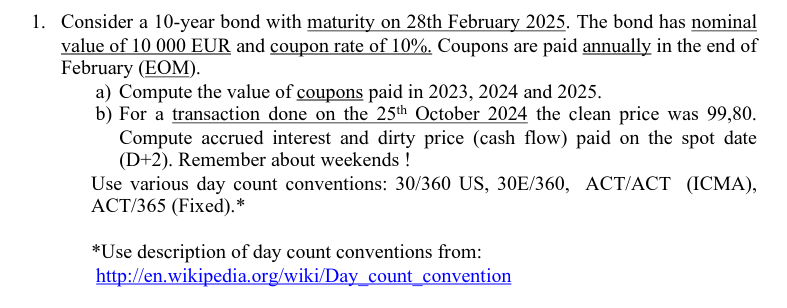

In [6]:
from datetime import date, timedelta

In [2]:
nominal_value = 10000
coupon_rate = 0.10
annual_coupon = nominal_value * coupon_rate

In [3]:
def is_last_day_of_february(dt):
    return dt.month == 2 and (dt.day == 28 or (dt.day == 29 and dt.year % 4 == 0))

def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def days_in_year(year):
    return 366 if is_leap_year(year) else 365

In [4]:
def day_count_30_360(start_date, end_date, is_eom=True):
    # 30/360 US convention
    y1, m1, d1 = start_date.year, start_date.month, start_date.day
    y2, m2, d2 = end_date.year, end_date.month, end_date.day

    if is_eom:
        if is_last_day_of_february(start_date) and is_last_day_of_february(end_date):
            d2 = 30
        elif is_last_day_of_february(start_date):
            d1 = 30
    
    if d2 == 31 and (d1 == 30 or d1 == 31):
        d2 = 30
    
    if d1 == 31:
        d1 = 30
    
    day_count = 360 * (y2 - y1) + 30 * (m2 - m1) + (d2 - d1)
    
    return day_count / 360.0

def day_count_30E_360(start_date, end_date):
    # 30E/360 convention
    y1, m1, d1 = start_date.year, start_date.month, start_date.day
    y2, m2, d2 = end_date.year, end_date.month, end_date.day
    
    if d1 == 31:
        d1 = 30
    if d2 == 31:
        d2 = 30
    
    day_count = 360 * (y2 - y1) + 30 * (m2 - m1) + (d2 - d1)
    
    return day_count / 360.0

def day_count_ACT_ACT(start_date, end_date):
    # Actual/Actual ICMA convention
    day_count = (end_date - start_date).days
    start_year = start_date.year
    end_year = end_date.year

    if start_year == end_year:
        return day_count / days_in_year(start_year)
    else:
        days_in_start_year = (date(start_year + 1, 1, 1) - start_date).days
        days_in_end_year = (end_date - date(end_year, 1, 1)).days + 1
        
        return (days_in_start_year / days_in_year(start_year)) + (days_in_end_year / days_in_year(end_year)) + (end_year - start_year - 1)

def day_count_ACT_365(start_date, end_date):
    # Actual/365 Fixed convention
    return (end_date - start_date).days / 365.0

A

In [5]:
print('Coupons paid in 2023:')
print(f'[30/360 US]: \t\t{annual_coupon * day_count_30_360(date(2022, 2, 28), date(2023, 2, 28))}')
print(f'[30E/360]: \t\t{annual_coupon * day_count_30E_360(date(2022, 2, 28), date(2023, 2, 28))}')
print(f'[ACT/ACT (ICMA)]: \t{annual_coupon * day_count_ACT_ACT(date(2022, 2, 28), date(2023, 2, 28))}')
print(f'[ACT/365 (Fixed)]: \t{annual_coupon * day_count_ACT_365(date(2022, 2, 28), date(2023, 2, 28))}')
print('\n')
print('Coupons paid in 2024:')
print(f'[30/360 US]: \t\t{annual_coupon * day_count_30_360(date(2023, 2, 28), date(2024, 2, 29))}')
print(f'[30E/360]: \t\t{annual_coupon * day_count_30E_360(date(2023, 2, 28), date(2024, 2, 29))}')
print(f'[ACT/ACT (ICMA)]: \t{annual_coupon * day_count_ACT_ACT(date(2023, 2, 28), date(2024, 2, 29))}')
print(f'[ACT/365 (Fixed)]: \t{annual_coupon * day_count_ACT_365(date(2023, 2, 28), date(2024, 2, 29))}')
print('\n')
print('Coupons paid in 2025:')
print(f'[30/360 US]: \t\t{annual_coupon * day_count_30_360(date(2024, 2, 29), date(2025, 2, 28))}')
print(f'[30E/360]: \t\t{annual_coupon * day_count_30E_360(date(2024, 2, 29), date(2025, 2, 28))}')
print(f'[ACT/ACT (ICMA)]: \t{annual_coupon * day_count_ACT_ACT(date(2024, 2, 29), date(2025, 2, 28))}')
print(f'[ACT/365 (Fixed)]: \t{annual_coupon * day_count_ACT_365(date(2024, 2, 29), date(2025, 2, 28))}')

Coupons paid in 2023:
[30/360 US]: 		1005.5555555555555
[30E/360]: 		1000.0
[ACT/ACT (ICMA)]: 	1002.7397260273974
[ACT/365 (Fixed)]: 	1000.0


Coupons paid in 2024:
[30/360 US]: 		1005.5555555555555
[30E/360]: 		1002.7777777777777
[ACT/ACT (ICMA)]: 	1005.030316640467
[ACT/365 (Fixed)]: 	1002.7397260273974


Coupons paid in 2025:
[30/360 US]: 		1002.7777777777777
[30E/360]: 		997.2222222222223
[ACT/ACT (ICMA)]: 	1000.4416498240887
[ACT/365 (Fixed)]: 	1000.0


B

In [9]:
maturity_date = date(2025, 2, 28)
transaction_date = date(2024, 10, 25)
clean_price = 99.8

spot_date = transaction_date + timedelta(days=2)
if spot_date.weekday() >= 5:
    spot_date += timedelta(days=(7 - spot_date.weekday()))

last_coupon_date = date(transaction_date.year, 2, 28)

In [10]:
dcf_30_360_us_provided = day_count_30_360(last_coupon_date, transaction_date)
dcf_30e_360_provided = day_count_30E_360(last_coupon_date, transaction_date)
dcf_act_act_icma_provided = day_count_ACT_ACT(last_coupon_date, transaction_date)
dcf_act_365_fixed_provided = day_count_ACT_365(last_coupon_date, transaction_date)

accrued_interest_30_360_us_provided = annual_coupon * dcf_30_360_us_provided
accrued_interest_30e_360_provided = annual_coupon * dcf_30e_360_provided
accrued_interest_act_act_icma_provided = annual_coupon * dcf_act_act_icma_provided
accrued_interest_act_365_fixed_provided = annual_coupon * dcf_act_365_fixed_provided

In [12]:
print('Accured interest:')
print(f'[30/360 US]: \t\t{accrued_interest_30_360_us_provided}')
print(f'[30E/360]: \t\t{accrued_interest_30e_360_provided}')
print(f'[ACT/ACT (ICMA)]: \t{accrued_interest_act_act_icma_provided}')
print(f'[ACT/365 (Fixed)]: \t{accrued_interest_act_365_fixed_provided}')
print('\n')
print('Dirty Price:')
print(f'[30/360 US]: \t\t{clean_price / 100 * nominal_value + accrued_interest_30_360_us_provided}')
print(f'[30E/360]: \t\t{clean_price / 100 * nominal_value + accrued_interest_30e_360_provided}')
print(f'[ACT/ACT (ICMA)]: \t{clean_price / 100 * nominal_value + accrued_interest_act_act_icma_provided}')
print(f'[ACT/365 (Fixed)]: \t{clean_price / 100 * nominal_value + accrued_interest_act_365_fixed_provided}')

Accured interest:
[30/360 US]: 		652.7777777777778
[30E/360]: 		658.3333333333334
[ACT/ACT (ICMA)]: 	655.7377049180327
[ACT/365 (Fixed)]: 	657.5342465753424


Dirty Price:
[30/360 US]: 		10632.777777777777
[30E/360]: 		10638.333333333334
[ACT/ACT (ICMA)]: 	10635.737704918032
[ACT/365 (Fixed)]: 	10637.534246575342


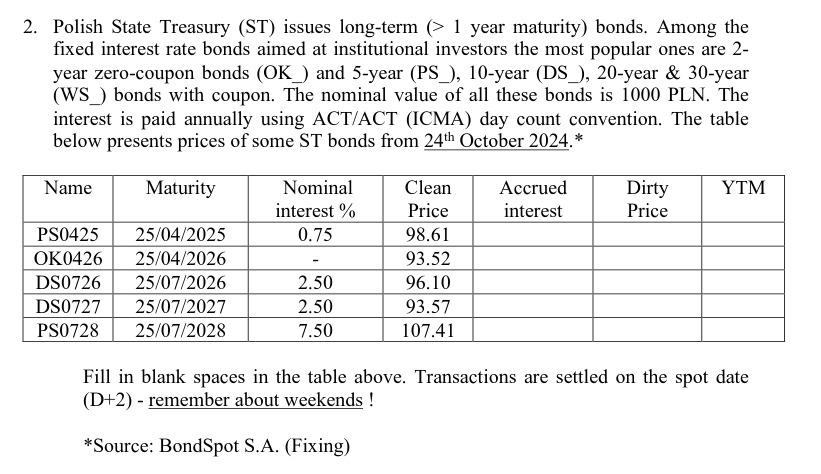

In [ ]:
import numpy as np
import numpy_financial as npf

def calculate_accrued_interest(nominal_interest_rate, nominal_value, days_from_last_coupon, days_in_period):
    return (nominal_interest_rate / 100) * nominal_value * (days_from_last_coupon / days_in_period)

def calculate_dirty_price(clean_price, accrued_interest):
    return clean_price + accrued_interest

def calculate_ytm(clean_price, nominal_value, coupon_rate, years_to_maturity, coupon_frequency=2):
    periods = years_to_maturity * coupon_frequency
    coupon_payment = nominal_value * coupon_rate / 100 / coupon_frequency
    
    ytm_guess = 0.05
    tolerance = 1e-6 
    max_iterations = 1000
    iteration = 0

    def price_at_ytm(ytm):
        return sum([coupon_payment / (1 + ytm / coupon_frequency)**(coupon_frequency * t) for t in range(1, periods + 1)]) + nominal_value / (1 + ytm / coupon_frequency)**periods

    while iteration < max_iterations:
        price = price_at_ytm(ytm_guess)
        if abs(price - clean_price) < tolerance:
            break
        ytm_guess += 0.0001 
        iteration += 1

    return ytm_guess * 100 

def calculate_ytm_using_npf(clean_price, nominal_value, coupon_rate, years_to_maturity, coupon_frequency=1):
    periods = years_to_maturity * coupon_frequency
    coupon_payment = nominal_value * coupon_rate / 100 / coupon_frequency
    
    cash_flows = [-clean_price]
    for t in range(1, periods + 1):
        cash_flows.append(coupon_payment) 
    cash_flows.append(nominal_value) 
    
    ytm = npf.irr(cash_flows) 
    return ytm * 100 

bonds = [
    {"name": "PS0425", "maturity": "25/04/2025", "nominal_interest": 0.75, "clean_price": 98.61, "last_coupon_date": "25/04/2024", "settlement_date": "28/10/2024", "nominal_value": 1000, "days_in_period": 365, "years_to_maturity": 5},
    {"name": "OK0426", "maturity": "25/04/2026", "nominal_interest": 0.0, "clean_price": 93.52, "last_coupon_date": "25/04/2024", "settlement_date": "28/10/2024", "nominal_value": 1000, "days_in_period": 365, "years_to_maturity": 2},
    {"name": "DS0726", "maturity": "25/07/2026", "nominal_interest": 2.50, "clean_price": 96.10, "last_coupon_date": "25/07/2024", "settlement_date": "28/10/2024", "nominal_value": 1000, "days_in_period": 365, "years_to_maturity": 10},
    {"name": "DS0727", "maturity": "25/07/2027", "nominal_interest": 2.50, "clean_price": 93.57, "last_coupon_date": "25/07/2024", "settlement_date": "28/10/2024", "nominal_value": 1000, "days_in_period": 365, "years_to_maturity": 10},
    {"name": "PS0728", "maturity": "25/07/2028", "nominal_interest": 7.50, "clean_price": 107.41, "last_coupon_date": "25/07/2024", "settlement_date": "28/10/2024", "nominal_value": 1000, "days_in_period": 365, "years_to_maturity": 10}
]

days_from_last_coupon = {
    "PS0425": 185,
    "OK0426": 0,  
    "DS0726": 95,
    "DS0727": 95,
    "PS0728": 95
}

results = []
for bond in bonds:
    bond_name = bond["name"]
    clean_price = bond["clean_price"]
    nominal_interest_rate = bond["nominal_interest"]
    nominal_value = bond["nominal_value"]
    years_to_maturity = bond["years_to_maturity"]
    last_coupon_to_settlement_days = days_from_last_coupon[bond_name]
    
    accrued_interest = calculate_accrued_interest(nominal_interest_rate, nominal_value, last_coupon_to_settlement_days, bond["days_in_period"])
    dirty_price = calculate_dirty_price(clean_price, accrued_interest)
    ytm = calculate_ytm(clean_price, nominal_value, nominal_interest_rate, years_to_maturity)
    # ytm = calculate_ytm_using_npf(clean_price, nominal_value, nominal_interest_rate, years_to_maturity)
    
    
    results.append({
        "Name": bond_name,
        "Maturity": bond["maturity"],
        "Nominal Interest %": nominal_interest_rate,
        "Clean Price": clean_price,
        "Accrued Interest": round(accrued_interest, 2),
        "Dirty Price": round(dirty_price, 2),
        "YTM (%)": round(ytm, 2)
    })

print(f"{'Name':<10} {'Maturity':<12} {'Nominal Interest %':<20} {'Clean Price':<15} {'Accrued Interest':<20} {'Dirty Price':<15} {'YTM (%)':<10}")
print("="*110)

for result in results:
    print(f"{result['Name']:<10} {result['Maturity']:<12} {result['Nominal Interest %']:<20} {result['Clean Price']:<15} {result['Accrued Interest']:<20} {result['Dirty Price']:<15} {result['YTM (%)']:<10}")


Name       Maturity     Nominal Interest %   Clean Price     Accrued Interest     Dirty Price     YTM (%)   
PS0425     25/04/2025   0.75                 98.61           3.8                  102.41          15.0      
OK0426     25/04/2026   0.0                  93.52           0.0                  93.52           15.0      
DS0726     25/07/2026   2.5                  96.1            6.51                 102.61          15.0      
DS0727     25/07/2027   2.5                  93.57           6.51                 100.08          15.0      
PS0728     25/07/2028   7.5                  107.41          19.52                126.93          15.0      


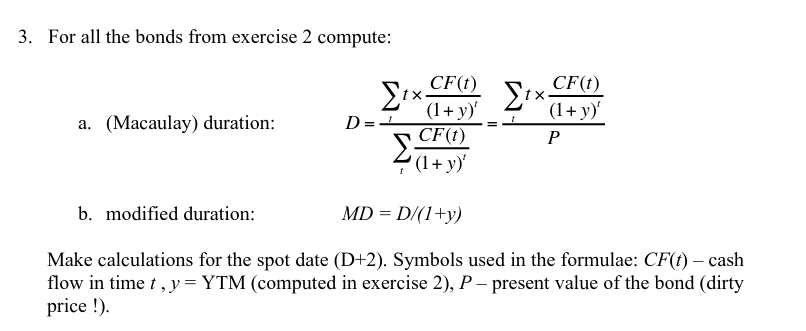

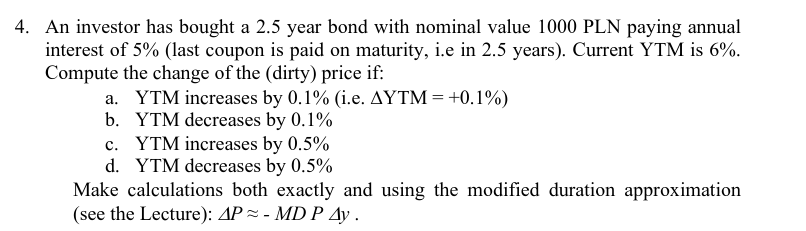

1st in t=0.5  50 PLN  
2nd in t=1.5  50 PLN  
3rd in t=2.5  50 PLN  

PV = sum t 0->n (CPN(t) / (1 + y) ** t) + FV / (1 + y) ** t  

In [31]:
cpn = 50

def mod_duration_approx(ytm, delta_y, cpn=50, T=2.5, nominal=1000):
    sum = 0
    coupon_dates = [T - i for i in range(int(T)+1)] # in years from now

    for t in coupon_dates:
        sum += t * cpn / (1 + ytm) ** t

    MD = -1 / (1 + ytm) * (sum + T * nominal / (1 + ytm) ** T) * delta_y
    return MD

# default
y_plus_one = 0.06 + 1
PV1 = (cpn / y_plus_one ** 0.5) + (cpn / y_plus_one ** 1.5) + (cpn / y_plus_one ** 2.5) + 1000 / y_plus_one ** 2.5
print("value with YTM = 6.0%\n", PV1)

# a)
y_plus_one = 0.06 + 0.001 + 1
PV2 = (cpn / y_plus_one ** 0.5) + (cpn / y_plus_one ** 1.5) + (cpn / y_plus_one ** 2.5) + 1000 / y_plus_one ** 2.5
print("\na)")
print("value with YTM = 6.1%\n", PV2)
print("exact change:\t\t\t", -(PV1-PV2))
print("change with MD approximation:\t", mod_duration_approx(ytm=0.06, delta_y=0.001))

# b)
y_plus_one = 0.06 - 0.001 + 1
PV3 = (cpn / y_plus_one ** 0.5) + (cpn / y_plus_one ** 1.5) + (cpn / y_plus_one ** 2.5) + 1000 / y_plus_one ** 2.5
print("\nb)")
print("value with YTM = 5.9%\n", PV3)
print("exact change:\t\t\t", -(PV1-PV3))
print("change with MD approximation:\t", mod_duration_approx(ytm=0.06, delta_y=-0.001))


# c)
y_plus_one = 0.06 + 0.005 + 1
PV4 = (cpn / y_plus_one ** 0.5) + (cpn / y_plus_one ** 1.5) + (cpn / y_plus_one ** 2.5) + 1000 / y_plus_one ** 2.5
print("\nc)")
print("value with YTM = 6.5%\n", PV4)
print("exact change:\t\t\t", -(PV1-PV4))
print("change with MD approximation:\t", mod_duration_approx(ytm=0.06, delta_y=0.005))


# d)
y_plus_one = 0.06 - 0.005 + 1
PV5 = (cpn / y_plus_one ** 0.5) + (cpn / y_plus_one ** 1.5) + (cpn / y_plus_one ** 2.5) + 1000 / y_plus_one ** 2.5
print("\nc)")
print("value with YTM = 5.5%\n", PV5)
print("exact change:\t\t\t", -(PV1-PV5))
print("change with MD approximation:\t", mod_duration_approx(ytm=0.06, delta_y=-0.005))


value with YTM = 6.0%
 1002.0426717046041

a)
value with YTM = 6.1%
 999.817838075867
exact change:			 -2.2248336287370876
change with MD approximation:	 -2.228455398264033

b)
value with YTM = 5.9%
 1004.2747590686403
exact change:			 2.232087364036147
change with MD approximation:	 2.228455398264033

c)
value with YTM = 6.5%
 990.9904330675222
exact change:			 -11.052238637081928
change with MD approximation:	 -11.142276991320166

c)
value with YTM = 5.5%
 1013.2762616291542
exact change:			 11.233589924550074
change with MD approximation:	 11.142276991320166


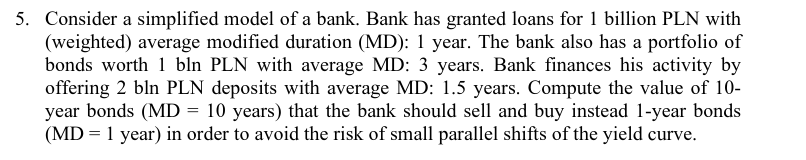

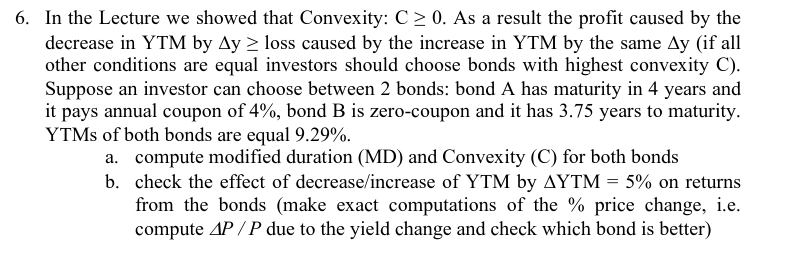